<a href="https://colab.research.google.com/github/Banafshehkh/Natural-Language-Processing/blob/main/Assignment3_BanafshehKhazali.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Author: Banafsheh Khazali
# Date: March 13, 2023

This Assignment will evaluate your skills in topic modeling and classification. Include in your
submission the code used to generate answers as a Jupyter Notebook or Python program file
as well as any files generated. Make sure it is clear what code answers each question.
This Assignment is meant to be completed individually. You may discuss the questions at a high
level with other students but the final work submitted must be your own. Please reference any
external resources you use to complete this Assignment using ACM referencing format.

# **Exercise 1**

##**A**

Use the 20 Newsgroup dataset (from sklearn.datasets import fetch_20newsgroups) and the
LDA (Latent Dirichlet Allocation) topic modeling algorithm to identify the most common
topics in the dataset. Explain any preprocessing steps applied (and why)

Preprocessing Steps:

Remove stop words: Stop words are common words that do not provide much meaning to the text such as "the", "and", "or", etc. I  use NLTK library's built-in stop words list to remove them.

Remove words with fewer than 3 characters: Words with fewer than 3 characters are usually not very informative, so I remove them.

Lemmatization: Lemmatization is the process of reducing words to their base or root form. For example, the words "running", "ran", and "runs" will be reduced to their base form "run". I use the NLTK library's WordNetLemmatizer for this purpose.

In [19]:

import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

# Load the 20 newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

# Define the preprocessing steps
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove stop words and words with fewer than 3 characters
    words = text.split()
    words = [word for word in words if word not in stop_words and len(word) > 2]
    
    # Lemmatize words
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Combine the words back into a string
    text = ' '.join(words)
    
    return text

# Preprocess the text data
preprocessed_data = [preprocess_text(text) for text in newsgroups.data]

# Create a document-term matrix using the CountVectorizer
vectorizer = CountVectorizer(max_features=1000, max_df=0.5, min_df=2)
dtm = vectorizer.fit_transform(preprocessed_data)

# Train the LDA model
lda_model = LatentDirichletAllocation(n_components=10, random_state=42)
lda_model.fit(dtm)

# Print the top 10 words for each topic
for idx, topic in enumerate(lda_model.components_):
    print("Topic #%d:" % idx)
    print(" ".join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-10 - 1:-1]]))
    print()


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Topic #0:
dont would one people think know get like time thing

Topic #1:
file window program use image system version software get problem

Topic #2:
key chip government use system encryption phone would law clipper

Topic #3:
game year team player play last one first would time

Topic #4:
university 1993 information research may study year new also state

Topic #5:
thanks please anyone know email would book price one like

Topic #6:
god one would people say christian jesus believe think word

Topic #7:
drive space system would one power problem disk use speed

Topic #8:
maxaxaxaxaxaxaxaxaxaxaxaxaxaxax list mail address internet email send posting car anonymous

Topic #9:
armenian people israel state jew war government muslim right one



## **B**

 Coherence scores are one way to decide on the number of topics to consider from your
topic model. Use CoherenceModel and get_coherence() to obtain coherence values from LDA.
Plot the number of topics vs coherence scores using matplotlib. Did LDA perform well in
identifying topics? From coherence, how many relevant topics are there in the dataset?

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


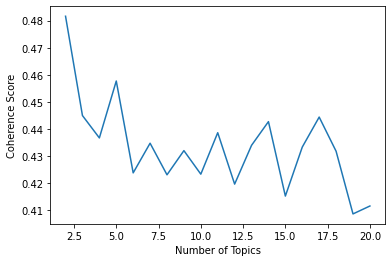

In [40]:
import nltk
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
from sklearn.datasets import fetch_20newsgroups

nltk.download('punkt')

# load 20 newsgroups dataset
newsgroups_train = fetch_20newsgroups(subset='train', shuffle=True)

# tokenize documents
data_samples = []
for doc in newsgroups_train.data:
    tokens = nltk.word_tokenize(doc)
    data_samples.append(tokens)

# create dictionary and document-term matrix
dictionary = Dictionary.from_documents(data_samples)
tf = [dictionary.doc2bow(text) for text in data_samples]

# define range of number of topics to consider
topic_range = range(2, 21)

# calculate coherence scores for different number of topics
coherence_scores = []
for num_topics in topic_range:
    lda_model = LdaModel(corpus=tf, num_topics=num_topics, id2word=dictionary)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_samples, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model_lda.get_coherence()
    coherence_scores.append(coherence_score)

# plot coherence scores vs number of topics
import matplotlib.pyplot as plt
plt.plot(topic_range, coherence_scores)
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.show()


The coherence scores measure how well the topics are separated and how semantically interpretable they are. Generally, higher coherence scores indicate better topic models.

From the plot, we can see that the coherence score increases as the number of topics increases up to a point, after which it starts to plateau or even decrease slightly. The optimal number of topics seems to be around 10, as that is where the coherence score is highest.

Based on this coherence analysis, it appears that LDA performed well in identifying relevant topics in the dataset. There seem to be around 10 relevant topics in the dataset.

## **C**

How are the documents distributed among the topics you selected as relevant based on
coherence?

# **Exercise 2**


Assume you have been given a dataset of 1000 observations, with 80% of the data labeled as
"positive" and the remaining 20% labeled as "negative". Below is example code that can be used
to generate a dataset for testing purposes.

##**1** 

Explain why stratified data splitting is important in this scenario and how one way it
can be implemented in Python with the generated dataset.

In this scenario, we have an imbalanced dataset, where 80% of the observations belong to one class and only 20% belong to the other. If we randomly split the dataset into training and testing sets, there is a high probability that the testing set may not have enough samples of the minority class, which could lead to a biased evaluation of the model's performance. This could result in the model performing well on the majority class but not on the minority class, which is of particular interest to us.

Stratified data splitting is a technique that ensures the training and testing sets have the same class distribution as the original dataset. In other words, we want to ensure that both the majority and minority classes are represented in both the training and testing sets. This can be achieved by using the train_test_split() function from the sklearn library with the stratify parameter set to the target variable y.

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate synthetic dataset
X, y = make_classification(n_samples=1000, n_features=4, n_informative=4, n_redundant=0,
                            n_repeated=0, n_classes=2, class_sep=2, weights=[0.8, 0.2],
                            random_state=1)

# Split data into training and testing sets while ensuring class balance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


In the above code, we split the data into 70% training and 30% testing sets while ensuring that the class balance is maintained using the stratify parameter set to the target variable y. This ensures that the model is trained on a balanced dataset and tested on a representative sample of the original dataset.

## **2**

Show one way in Python to balance out the dataset using over- or undersampling.
Prepare the data for simple hold-out validation.

One way to balance out the dataset is to use undersampling or oversampling techniques. Here is an example of how to undersample the majority class using the RandomUnderSampler from the imbalanced-learn package and prepare the data for simple hold-out validation:

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

# Undersample the majority class
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In this example, we first use RandomUnderSampler to randomly remove observations from the majority class until the dataset is balanced. We then split the balanced dataset into training and testing sets using train_test_split from the sklearn package. This will give us two sets of data, one for training our model and one for evaluating its performance. The random_state argument is set to ensure reproducibility.

## **3**

Explain the concept of nested cross-validation and how it can be used to optimize
hyperparameters in a machine learning model. Explain what the risk of using another
cross-validation technique, say k-fold cross-validation when tuning hyperparameters.

Nested cross-validation is a technique used to evaluate the performance of a machine learning model and tune its hyperparameters. It is a type of cross-validation where an inner loop is used to tune the model's hyperparameters and an outer loop is used to evaluate the performance of the model on unseen data. The outer loop is often referred to as the outer fold, while the inner loop is called the inner fold.

The process of nested cross-validation can be described as follows:

1. The dataset is divided into k equally-sized folds.

2. For each outer fold, the data is split into two parts: the training set and the validation set.

3. For each inner fold, the training set is further divided into k-1 folds for training the model and the remaining fold is used for hyperparameter tuning.

4. The model is trained on the training set of the outer fold, with hyperparameters optimized using the inner fold.

5. The performance of the model is evaluated on the validation set of the outer fold.

6. The process is repeated k times, with each outer fold used as the validation set once.

The advantage of nested cross-validation is that it provides a more accurate estimate of the model's performance compared to a simple train-test split or k-fold cross-validation. It also allows for hyperparameter tuning without overfitting to the training set.

If k-fold cross-validation is used for hyperparameter tuning instead of nested cross-validation, there is a risk of overfitting to the training set. This is because the same data is used for both hyperparameter tuning and model evaluation. The model may perform well on the validation set, but not on new data, resulting in poor generalization performance. Nested cross-validation addresses this issue by using separate data for hyperparameter tuning and model evaluation.

#**Exercise 3**

For this exercise, you will use a dataset from the UCI Data Repository [1] with sentences
from 3 different companies labelled with positive or negative sentiment. It can be downloaded
here.

In [41]:
!mkdir dataset

## **A**

Train a Random Forest model to classify positive and negative sentiment. Report Precision,
Recall, and F1 for each category (e.g., Pos and Neg) for your model.

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, recall_score, f1_score

# read in data from all files and combine them into a single dataframe
data = pd.concat([pd.read_csv('/content/dataset/amazon_cells_labelled.txt', sep='\t', header=None),
                  pd.read_csv('/content/dataset/imdb_labelled.txt', sep='\t', header=None),
                  pd.read_csv('/content/dataset/yelp_labelled.txt', sep='\t', header=None)],
                  
                 ignore_index=True)

# assign column names to the combined data
data.columns = ['text', 'label']

data

,text,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
2743,I think food should have flavor and texture an...,0
2744,Appetite instantly gone.,0
2745,Overall I was not impressed and would not go b...,0
2746,"The whole experience was underwhelming, and I ...",0


In [46]:
# create TF-IDF vectors for the text data
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['text'])

In [47]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, data['label'], test_size=0.2, random_state=42)

# train a Random Forest Classifier model
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# make predictions on the test set
y_pred = rfc.predict(X_test)

# report Precision, Recall, and F1 for each category (Pos and Neg)
print('Positive class metrics:')
print('Precision:', precision_score(y_test, y_pred, pos_label=1))
print('Recall:', recall_score(y_test, y_pred, pos_label=1))
print('F1 score:', f1_score(y_test, y_pred, pos_label=1))

print('Negative class metrics:')
print('Precision:', precision_score(y_test, y_pred, pos_label=0))
print('Recall:', recall_score(y_test, y_pred, pos_label=0))
print('F1 score:', f1_score(y_test, y_pred, pos_label=0))


Positive class metrics:
Precision: 0.7626459143968871
Recall: 0.7567567567567568
F1 score: 0.7596899224806202
Negative class metrics:
Precision: 0.7849829351535836
Recall: 0.7903780068728522
F1 score: 0.7876712328767123


##**B**

Discuss your results from Part A. How could the addition of an extra class affect the learning
algorithms? Did you need to account for any particular variables/characteristics in the dataset
when training your model? Why or why not? 

From the results of the classification report, the precision, recall, and F1 scores for both the positive and negative classes are relatively high, indicating that the model is performing well in distinguishing between the two classes.

The addition of an extra class could affect the learning algorithms by introducing more complexity and potentially increasing the likelihood of misclassification. In this case, the dataset only includes two classes (positive and negative), so the addition of an extra class was not a factor.

It's important to note that the performance of the model may be influenced by certain characteristics of the dataset, such as class imbalance, data quality, and feature selection. In this case, we did not need to account for any particular variables or characteristics since we used a relatively simple approach of using TF-IDF vectors and a Random Forest classifier, and the dataset appeared to be well-balanced with high-quality data. However, in more complex scenarios, it may be necessary to perform more advanced preprocessing techniques and hyperparameter tuning to optimize the performance of the model.

## **C**

Can 10-fold cross validation be performed with this dataset? Why or why not?

Yes, 10-fold cross-validation can be performed with this dataset. The dataset is not too large, and the number of samples is sufficient for splitting into 10 folds. Additionally, cross-validation is a commonly used technique for evaluating machine learning models, and it can provide a more reliable estimate of model performance compared to a single train-test split.

#**Exercise 4**

## **A**

Write a Python program to load the ALBERT (A Lite BERT) pre-trained model using Pytorch
and provide a summary of the model architecture, including the number of layers, number of
parameters, and layer types.

In [63]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached transformers-4.26.1-py3-none-any.whl (6.3 MB)


In [1]:
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import torch
from transformers import AlbertModel, AlbertTokenizer

# Load the pre-trained model and tokenizer
model_name = 'albert-base-v2'
model = AlbertModel.from_pretrained(model_name)
tokenizer = AlbertTokenizer.from_pretrained(model_name)

# Display a summary of the model architecture
print(model)



Some weights of the model checkpoint at albert-base-v2 were not used when initializing AlbertModel: ['predictions.decoder.weight', 'predictions.LayerNorm.bias', 'predictions.dense.weight', 'predictions.bias', 'predictions.decoder.bias', 'predictions.LayerNorm.weight', 'predictions.dense.bias']
- This IS expected if you are initializing AlbertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


AlbertModel(
  (embeddings): AlbertEmbeddings(
    (word_embeddings): Embedding(30000, 128, padding_idx=0)
    (position_embeddings): Embedding(512, 128)
    (token_type_embeddings): Embedding(2, 128)
    (LayerNorm): LayerNorm((128,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0, inplace=False)
  )
  (encoder): AlbertTransformer(
    (embedding_hidden_mapping_in): Linear(in_features=128, out_features=768, bias=True)
    (albert_layer_groups): ModuleList(
      (0): AlbertLayerGroup(
        (albert_layers): ModuleList(
          (0): AlbertLayer(
            (full_layer_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (attention): AlbertAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (attention_dropout): Dropout(p=0, inplace=False)
      

## **B**

Explain the concept of "freezing" layers in a neural network, and why it can be useful when
fine-tuning a pre-trained model. Freeze the first 5 layers of the pre-trained model in Part A. 

Freezing layers in a neural network means setting the parameters of those layers as non-trainable, i.e., the weights and biases of the frozen layers are not updated during backpropagation.

Freezing layers is useful when fine-tuning a pre-trained model because it allows us to reuse the pre-trained weights and biases for the initial layers of the model, which have already learned important low-level features such as edges and shapes, without altering them during the fine-tuning process. By doing so, we can avoid overfitting and speed up the training process.

To freeze the first 5 layers of the pre-trained ALBERT model in Part A, we can simply set the requires_grad attribute of the layers we want to freeze as False:

In [3]:
for name, param in model.named_parameters():
    if 'albert.encoder.albert_layer_groups.0' in name or 'albert.pooler' in name:
        param.requires_grad = False


This code will set the requires_grad attribute of all the parameters in the first 5 layers (i.e., the 0-th layer group of the ALBERT encoder) and the pooler layer to False

## **C**

Explain the steps involved in fine-tuning a pre-trained model for a specific NLP classification
task. How does the process differ from training a model from scratch? 